## Importation des librairies 

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
# import pandas as pd
from IPython import display
import pygame

In [ ]:
# Idée : Propagation du feu dans une forêt
# 0 = Terre
# 1 = Arbre
# 2 = Feu
# 3 = Mort

## Corps :

### Initialiser une forêt de taille n :

In [ ]:
def create_database(x,y,p):
    return np.random.choice([0,1],size=(x,y),p=[1-p,p])

In [ ]:
data = create_database(10,10,1)
data


### Afficher une forêt :

In [ ]:
def aff_forest(x,y,forest):
    x1,y1 = np.where(forest==1)# Foret x 
    x2,y2 = np.where(forest==0) # Terre x
    x3,y3 = np.where(forest==2) # Feu x
    x4,y4 = np.where(forest==3)    
    plt.title("Propagation du feu dans une forêt",fontweight="bold",fontname="Arial",fontsize="15")
    plt.scatter(x1,y1,c='green',marker='.',s=30)
    plt.scatter(x2,y2,c='grey',marker='.',s=30)
    plt.scatter(x3,y3,c='red',marker='.',s=30)
    plt.scatter(x4,y4,c='black',marker='.',s=30)
    return 0

In [ ]:
data[5][5]=2

In [ ]:
aff_forest(100,100,data)

In [ ]:
data

### Actualiser la forêt :

In [ ]:
def init_fire_spread(forest):
    if(len(np.unique(forest))==2):
        x,y=np.where(forest==1)
        random_i = np.random.randint(0,len(x),1)
        i_x = int(x[random_i])
        i_y = int(y[random_i])
        forest[i_x][i_y]=2
    elif(np.unique(forest)==[1]):
        x,y=np.where(forest==1)
        random_i = np.random.randint(0,len(x),1)
        i_x = int(x[random_i])
        i_y = int(y[random_i])
        forest[i_x][i_y]=2        
    return forest

In [ ]:
init_fire_spread(data)

In [39]:
def fire_spreading(forest):
    if((len(np.where(forest==2)[0])==0)and(len(np.where(forest==3)[0])==0)):
        init_fire_spread(forest)
    x,y = np.where(forest==2)
    for i in range(len(x)):
        if (x[i]<len(forest)-1) and (y[i]<len(forest[0])-1) and (x[i]>0) and (y[i] > 0):
            if forest[x[i]+1][y[i]]==1: #Droite
                forest[x[i]+1][y[i]]=2 
            if forest[x[i]-1][y[i]]==1: #Gauche
                forest[x[i]-1][y[i]]=2
            if forest[x[i]][y[i]+1]==1: #Haut
                forest[x[i]][y[i]+1]=2
            if forest[x[i]][y[i]-1]==1: #Bas
                forest[x[i]][y[i]-1]=2
            forest[x[i]][y[i]]=3
        else:
            forest[x[i]][y[i]]=3
            
    if(len(np.where(forest==2)[0])==0):
        nb_arbre = len(np.where(forest==3)[0])+len(np.where(forest==1)[0])
        nb_arbre_brule = len(np.where(forest==3)[0])
        print("Nombre d'arbres total : ",nb_arbre,"\n Nombre d'arbres brulés : ",nb_arbre_brule,"\n Proportion nb_arbre_brule/nb_arbre : ",(nb_arbre_brule/nb_arbre)*100,"%")
        return 0

In [40]:
fire_spreading(data)

### Simuler la propagation :

In [41]:
def launch(x,y,p):
    forest = create_database(x,y,p)
    print("Pourcentage d'arbre : ",p*100,"%")
    while fire_spreading(forest)!=0:
        init_fire_spread(forest)
        aff_forest(x,y,forest)
        plt.pause(0.01)
        display.clear_output(wait=True)
    print("Pourcentage d'arbre : ",p*100,"%")
    return aff_forest(x,y,forest)

Nombre d'arbres total :  2255 
 Nombre d'arbres brulés :  2228 
 Proportion nb_arbre_brule/nb_arbre :  98.80266075388026 %


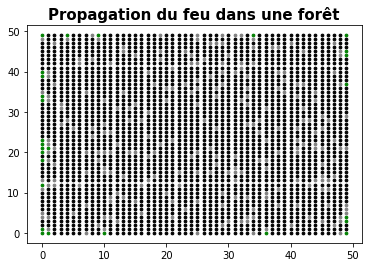

In [ ]:
launch(50,50,.9)

In [42]:
def draw(screen,data):
    x=0
    y=0
    unit=500/len(data)
    for i in range(len(data)):
        for j in range(len(data[0])):
            if(data[i][j]==1):
                pygame.draw.rect(screen,(71, 252, 80), pygame.Rect(x, y, x+unit, y+unit))
                x+=unit
            if(data[i][j]==0):
                pygame.draw.rect(screen,(247, 213, 143), pygame.Rect(x, y, x+unit, y+unit))
                x+=unit  
            if(data[i][j]==2):
                pygame.draw.rect(screen,(255, 64, 67), pygame.Rect(x, y, x+unit, y+unit))
                x+=unit
            if(data[i][j]==3):
                pygame.draw.rect(screen,(33, 13, 4), pygame.Rect(x, y, x+unit, y+unit))
                x+=unit
        y+=unit
        x=0

    pygame.display.flip()

In [16]:
pygame.init()

screen = pygame.display.set_mode((500, 500))
screen.fill("white")
pygame.display.set_caption("Propagation d'un feu de forêt")

data = create_database(50,50,.9)

while fire_spreading(data)!=0:
    for event in pygame.event.get():
        if event.type == pygame.QUIT:
           pygame.quit()
    init_fire_spread(data)
    draw(screen,data)
    plt.pause(0.1)
    display.clear_output(wait=True)
pygame.quit()

Nombre d'arbres total :  2252 
 Nombre d'arbres brulés :  2233 
 Proportion nb_arbre_brule/nb_arbre :  99.1563055062167 %


In [43]:
def humidite(forest, tx):
    if((len(np.where(forest==2)[0])==0)and(len(np.where(forest==3)[0])==0)):
        init_fire_spread(forest)
    x,y = np.where(forest==2)
    for i in range(len(x)):
        reussite = np.random.choice([0,1,],size=1,p=[tx,1-tx])
        if (x[i]<len(forest)-1) and (y[i]<len(forest[0])-1) and (x[i]>0) and (y[i] > 0) and reussite==1:
            
            if forest[x[i]+1][y[i]]==1: #Droite
                forest[x[i]+1][y[i]]=2 
            if forest[x[i]-1][y[i]]==1: #Gauche
                forest[x[i]-1][y[i]]=2
            if forest[x[i]][y[i]+1]==1: #Haut
                forest[x[i]][y[i]+1]=2
            if forest[x[i]][y[i]-1]==1: #Bas
                forest[x[i]][y[i]-1]=2
            forest[x[i]][y[i]]=3
        else:
            forest[x[i]][y[i]]=3
            
    if(len(np.where(forest==2)[0])==0):
        nb_arbre = len(np.where(forest==3)[0])+len(np.where(forest==1)[0])
        nb_arbre_brule = len(np.where(forest==3)[0])
        print("Nombre d'arbres total : ",nb_arbre,"\n Nombre d'arbres brulés : ",nb_arbre_brule,"\n Proportion nb_arbre_brule/nb_arbre : ",(nb_arbre_brule/nb_arbre)*100,"%")
        return 0

In [44]:
def vent(forest):
    if((len(np.where(forest==2)[0])==0)and(len(np.where(forest==3)[0])==0)):
        init_fire_spread(forest)
    x,y = np.where(forest==2)
    for i in range(len(x)):
        if (x[i]<len(forest)-1) and (y[i]<len(forest[0])-1) and (x[i]>0) and (y[i] > 0):
            reussite_direction = np.random.choice([0,1,],size=1,p=[0.1,0.9])
            reussite_direction_inverse = np.random.choice([0,1,],size=1,p=[0.5,0.5])
            reussite_cote = np.random.choice([0,1,],size=1,p=[0.9,0.1])
            print("Reussite 1 : ",reussite_direction, " Reussite 2 : ", reussite_cote, " Reussite 3 : ",reussite_direction_inverse)
            if forest[x[i]+1][y[i]]==1 and reussite_cote==1: #Droite
                forest[x[i]+1][y[i]]=2 
            if forest[x[i]-1][y[i]]==1 and reussite_cote==1: #Gauche
                forest[x[i]-1][y[i]]=2
            if forest[x[i]][y[i]+1]==1 and reussite_direction==1: #Haut
                forest[x[i]][y[i]+1]=2
            if forest[x[i]][y[i]-1]==1 and reussite_direction_inverse==1: #Bas
                forest[x[i]][y[i]-1]=2
            if forest[x[i]+1][y[i]+1]==1 and reussite_direction==1: # Haut-droite
                forest[x[i]+1][y[i]+1]=2
            if forest[x[i]-1][y[i]+1]==1 and reussite_direction==1: # Haut-gauche
                forest[x[i]-1][y[i]+1]=2
            forest[x[i]][y[i]]=3
        else:
            forest[x[i]][y[i]]=3
            
    if(len(np.where(forest==2)[0])==0):
        nb_arbre = len(np.where(forest==3)[0])+len(np.where(forest==1)[0])
        nb_arbre_brule = len(np.where(forest==3)[0])
        print("Nombre d'arbres total : ",nb_arbre,"\n Nombre d'arbres brulés : ",nb_arbre_brule,"\n Proportion nb_arbre_brule/nb_arbre : ",(nb_arbre_brule/nb_arbre)*100,"%")
        return 0

In [29]:
reussite = [np.random.choice([0,1,],size=1,p=[.1,.9]) for i in range(10)]
reussite

[array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([1])]

In [20]:
pygame.init()

screen = pygame.display.set_mode((500, 500))
screen.fill("white")
pygame.display.set_caption("Propagation d'un feu de forêt")

data = create_database(50,50,.9)

while humidite(data,.3)!=0:
    for event in pygame.event.get():
        if event.type == pygame.QUIT:
           pygame.quit()
    init_fire_spread(data)
    draw(screen,data)
    plt.pause(0.1)
    display.clear_output(wait=True)
pygame.quit()

Nombre d'arbres total :  2238 
 Nombre d'arbres brulés :  1 
 Proportion nb_arbre_brule/nb_arbre :  0.044682752457551385 %


In [30]:
pygame.init()

screen = pygame.display.set_mode((500, 500))
screen.fill("white")
pygame.display.set_caption("Propagation d'un feu de forêt")

data = create_database(50,50,.9)

while vent(data)!=0:
    for event in pygame.event.get():
        if event.type == pygame.QUIT:
           pygame.quit()
    init_fire_spread(data)
    draw(screen,data)
    plt.pause(0.1)
    display.clear_output(wait=True)
pygame.quit()

Reussite 1 :  [1]  Reussite 2 :  [0]  Reussite 3 :  [1]
Reussite 1 :  [0]  Reussite 2 :  [0]  Reussite 3 :  [1]
Nombre d'arbres total :  2259 
 Nombre d'arbres brulés :  1186 
 Proportion nb_arbre_brule/nb_arbre :  52.501106684373624 %


In [61]:
def humidite2(forest, tx):
    if((len(np.where(forest==2)[0])==0)and(len(np.where(forest==3)[0])==0)):
        init_fire_spread(forest)
    x,y = np.where(forest==2)
    for i in range(len(x)):
        reussite = np.random.choice([0,1,],size=1,p=[tx-0.2,1-tx+0.2])
        if (x[i]<len(forest)-1) and (y[i]<len(forest[0])-1) and (x[i]>0) and (y[i] > 0) and reussite==1:
            
            if forest[x[i]+1][y[i]]==1: #Droite
                forest[x[i]+1][y[i]]=2 
            if forest[x[i]-1][y[i]]==1: #Gauche
                forest[x[i]-1][y[i]]=2
            if forest[x[i]][y[i]+1]==1: #Haut
                forest[x[i]][y[i]+1]=2
            if forest[x[i]][y[i]-1]==1: #Bas
                forest[x[i]][y[i]-1]=2
            forest[x[i]][y[i]]=3
        else:
            forest[x[i]][y[i]]=3
            
    if(len(np.where(forest==2)[0])==0):
        nb_arbre = len(np.where(forest==3)[0])+len(np.where(forest==1)[0])
        nb_arbre_brule = len(np.where(forest==3)[0])
        tx = (nb_arbre_brule/nb_arbre)
    
        return (nb_arbre,nb_arbre_brule,tx)

In [48]:
def simulation_humidite(nb_arbre,tx_foret,tx_humide):
    pygame.init()
    screen = pygame.display.set_mode((500, 500))
    screen.fill("white")
    pygame.display.set_caption("Propagation d'un feu de forêt") 
    
    data = create_database(nb_arbre,nb_arbre,tx_foret)
    print(str(humidite2(data,tx_humide)))
    
    while str(humidite2(data,tx_humide))=='None':
        for event in pygame.event.get():
            if event.type == pygame.QUIT:
               pygame.quit()
        init_fire_spread(data)
        draw(screen,data)
        plt.pause(0.1)
        display.clear_output(wait=True)
    pygame.quit()
    arbre,arbre_brule,taux = humidite2(data,tx_humide)
    print("Nb d'abre : ",arbre,", Nombre d'arbre brulé : ",arbre_brule,", Taux : ",taux)
    return [arbre,arbre_brule,taux]

In [49]:
simulation_humidite(10,0.9,0.4)

Nb d'abre :  92 , Nombre d'arbre brulé :  75 , Taux :  0.8152173913043478


[92, 75, 0.8152173913043478]

In [63]:
def mult_simulation_humidite(n, tx_foret, nb_exp):
    liste = []
    liste1 = []
    x = np.arange(0.2,1.2,0.2)
    for i in range(nb_exp):
        for j in x:
            liste1.append(simulation_humidite(n,tx_foret,j))
        liste.append(liste1)
        liste1=[]
    y = np.sum(liste,axis=0)/len(liste)
    y1 = []
    y2 = []
    y3 = []
    for k in y:
        y1.append(k[0])
        y2.append(k[1])
        y3.append(k[2])
    fig, axs = plt.subplots(3)
    fig.suptitle('Vertically stacked subplots')
    axs[0].plot(x, y1,c='red') #Nombre d'arbres
    axs[1].plot(x, y2,c='blue') #Nombre d'arbres brulés
    axs[2].plot(x, y3,c='green') #Proportion Nombre d'arbres brulés/Nombre d'arbres
    axs[0].set_xlabel("Nombre d'arbres")
    axs[1].set_xlabel("Nombre d'arbres brulés")
    axs[2].set_xlabel("Proportion Nombre d'arbres brulés/Nombre d'arbres")
    fig.tight_layout()
    return 1
    

In [ ]:
mult_simulation_humidite(10,0.9,10)

In [119]:
def fire_spreading2(forest):
    if((len(np.where(forest==2)[0])==0)and(len(np.where(forest==3)[0])==0)):
        init_fire_spread(forest)
    x,y = np.where(forest==2)
    for i in range(len(x)):
        if (x[i]<len(forest)-1) and (y[i]<len(forest[0])-1) and (x[i]>0) and (y[i] > 0):
            if forest[x[i]+1][y[i]]==1: #Droite
                forest[x[i]+1][y[i]]=2 
            if forest[x[i]-1][y[i]]==1: #Gauche
                forest[x[i]-1][y[i]]=2
            if forest[x[i]][y[i]+1]==1: #Haut
                forest[x[i]][y[i]+1]=2
            if forest[x[i]][y[i]-1]==1: #Bas
                forest[x[i]][y[i]-1]=2
            forest[x[i]][y[i]]=3
        else:
            forest[x[i]][y[i]]=3
            
    if(len(np.where(forest==2)[0])==0):
        nb_arbre = len(np.where(forest==3)[0])+len(np.where(forest==1)[0])
        nb_arbre_brule = len(np.where(forest==3)[0])
        print("Nombre d'arbres total : ",nb_arbre,"\n Nombre d'arbres brulés : ",nb_arbre_brule,"\n Proportion nb_arbre_brule/nb_arbre : ",(nb_arbre_brule/nb_arbre)*100,"%")
        taux = (nb_arbre_brule/nb_arbre)
        return [nb_arbre,nb_arbre_brule,taux]

In [157]:
def simulation(nb_arbre,tx_foret):
    pygame.init()
    screen = pygame.display.set_mode((500, 500))
    screen.fill("white")
    pygame.display.set_caption("Propagation d'un feu de forêt") 
    
    data = create_database(nb_arbre,nb_arbre,tx_foret)
    init_fire_spread(data)
    while str(fire_spreading2(data))=='None':
        for event in pygame.event.get():
            if event.type == pygame.QUIT:
               pygame.quit()
        init_fire_spread(data)
        draw(screen,data)
        plt.pause(0.1)
        display.clear_output(wait=True)
    pygame.quit()
    arbre,arbre_brule,taux = fire_spreading2(data)
    print("Nb d'abre : ",arbre,", Nombre d'arbre brulé : ",arbre_brule,", Taux : ",taux)
    return [arbre,arbre_brule,taux]

In [158]:
def mult_simulation(n, nb_exp):
    liste = []
    liste1 = []
    x = np.arange(0.1,1.1,0.1) # Densité
    for i in range(nb_exp):
        for j in x:
            liste1.append(simulation(n,j))
        liste.append(liste1)
        liste1=[]
    y = np.sum(liste,axis=0)/len(liste)
    y1 = []
    y2 = []
    y3 = []
    for k in y:
        y1.append(k[0])
        y2.append(k[1])
        y3.append(k[2])
    fig, axs = plt.subplots(3)
    fig.suptitle('Vertically stacked subplots')
    axs[0].plot(x, y1,c='red') #Nombre d'arbres
    axs[1].plot(x, y2,c='blue') #Nombre d'arbres brulés
    axs[2].plot(x, y3,c='green') #Proportion Nombre d'arbres brulés/Nombre d'arbres
    axs[0].set_xlabel("Nombre d'arbres")
    axs[1].set_xlabel("Nombre d'arbres brulés")
    axs[2].set_xlabel("Proportion Nombre d'arbres brulés/Nombre d'arbres")
    fig.tight_layout()
    return 1
    

Nombre d'arbres total :  96 
 Nombre d'arbres brulés :  92 
 Proportion nb_arbre_brule/nb_arbre :  95.83333333333334 %
Nombre d'arbres total :  96 
 Nombre d'arbres brulés :  92 
 Proportion nb_arbre_brule/nb_arbre :  95.83333333333334 %
Nb d'abre :  96 , Nombre d'arbre brulé :  92 , Taux :  0.9583333333333334
Nombre d'arbres total :  100 
 Nombre d'arbres brulés :  0 
 Proportion nb_arbre_brule/nb_arbre :  0.0 %
Nombre d'arbres total :  100 
 Nombre d'arbres brulés :  0 
 Proportion nb_arbre_brule/nb_arbre :  0.0 %
Nb d'abre :  100 , Nombre d'arbre brulé :  0 , Taux :  0.0


1

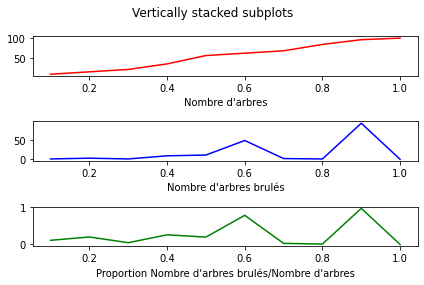

In [159]:
mult_simulation(10,1)

In [162]:
simulation(10,1)

Nombre d'arbres total :  100 
 Nombre d'arbres brulés :  0 
 Proportion nb_arbre_brule/nb_arbre :  0.0 %
Nombre d'arbres total :  100 
 Nombre d'arbres brulés :  0 
 Proportion nb_arbre_brule/nb_arbre :  0.0 %
Nb d'abre :  100 , Nombre d'arbre brulé :  0 , Taux :  0.0


[100, 0, 0.0]

In [67]:
def humidite2_(forest, tx):
    if((len(np.where(forest==2)[0])==0)and(len(np.where(forest==3)[0])==0)):
        init_fire_spread(forest)
    x,y = np.where(forest==2)
    for i in range(len(x)):
        reussite = np.random.choice([0,1,],size=1,p=[tx-0.2,1-tx+0.2])
        if (x[i]<len(forest)-1) and (y[i]<len(forest[0])-1) and (x[i]>0) and (y[i] > 0) and reussite==1:
            
            if forest[x[i]+1][y[i]]==1: #Droite
                forest[x[i]+1][y[i]]=2 
            if forest[x[i]-1][y[i]]==1: #Gauche
                forest[x[i]-1][y[i]]=2
            if forest[x[i]][y[i]+1]==1: #Haut
                forest[x[i]][y[i]+1]=2
            if forest[x[i]][y[i]-1]==1: #Bas
                forest[x[i]][y[i]-1]=2
            forest[x[i]][y[i]]=3
        else:
            forest[x[i]][y[i]]=3
            
    if(len(np.where(forest==2)[0])==0):
        nb_arbre = len(np.where(forest==3)[0])+len(np.where(forest==1)[0])
        nb_arbre_brule = len(np.where(forest==3)[0])
        tx = (nb_arbre_brule/nb_arbre)
    
        return (nb_arbre,nb_arbre_brule,tx)

In [74]:
donnes = []

def compte(foret):
    res3 = 0
    res1 = 0
    for i in range(len(foret)):
        res3 += foret[i].count(3)
        res1 += foret[i].count(1)
    return res1, res3



def simulation_humidite_(nb_arbre,tx_foret,tx_humide):
    tab = []
    pygame.init()
    screen = pygame.display.set_mode((500, 500))
    screen.fill("white")
    pygame.display.set_caption("Propagation d'un feu de forêt") 
    
    data = create_database(nb_arbre,nb_arbre,tx_foret)
    
    while str(humidite2_(data,tx_humide))=='None':
        for event in pygame.event.get():
            if event.type == pygame.QUIT:
               pygame.quit()
        init_fire_spread(data)
        draw(screen,data)
        plt.pause(0.1)
        display.clear_output(wait=True)
        arbre,arbre_brule = compte(data)
        tab.append([arbre,arbre_brule,taux])
    pygame.quit()
    arbre,arbre_brule,taux = humidite2_(data,tx_humide)
    print("Nb d'abre : ",arbre,", Nombre d'arbre brulé : ",arbre_brule,", Taux : ",taux)
    return tab

In [75]:
def trace(nb_arbre,tx_foret,tx_humide):
    tab = simulation_humidite_(nb_arbre,tx_foret,tx_humide)
    brule = [tab[i][1] for i in range(len(tab))]
    print(tab)
    plt.plot(range(0,len(tab)),brule)
    plt.show()

trace(10,.8,.6)

AttributeError: 'numpy.ndarray' object has no attribute 'count'

In [113]:
def compte(foret):
    res3 = 0
    res1 = 0
    for i in range(len(foret)):
        res3 += len(np.where(foret[i]==3))
        res1 += len(np.where(foret[i]==1))
    return res1, res3

In [112]:
compte([[0,1],[3,3],[2,1],[1,3]])


(array([], dtype=int64),)
(array([], dtype=int64),)
(array([], dtype=int64),)
(array([], dtype=int64),)


(4, 4)